<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA** <br>
**TÓPICOS EN APRENDIZAJE DE MÁQUINAS** <br>

## Regresiones



In [ ]:
# Importar librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

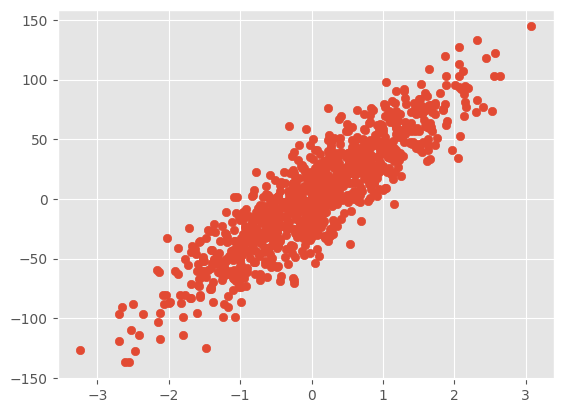

In [ ]:
# Genera un conjunto de datos sintético para regresión y grafica la relación
x,y = make_regression(n_samples=1000, n_features=2,n_informative=2, noise=20, random_state=42)
plt.scatter(x[:, 0],y)
plt.show()

In [3]:
# Divide en train y test
X_train, X_test, y_train, y_test = train_test_split(
                                        x,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 1234
                                    )

### Regresión Lineal
Dado unos datos de la forma
\begin{equation}
    \{y_i,x_{i1},...,x_{np}\}^n_{i=1}
\end{equation}

Podemos definir una relación lineal de la siguiente forma:
\begin{equation}
    y_i=\beta_0 + \ \beta_1 x_{i1}+...+ \beta_n x_{np} + \epsilon_i
\end{equation}

En forma matricial:
\begin{equation}
    Y = X\beta + \epsilon
\end{equation}

Que busca optimizar:
\begin{equation}
    (Y-X\beta)^T(Y-X\beta)
\end{equation}

In [ ]:
# Entrenar y evaluar modelo de regresión
reg = LinearRegression()
reg.fit(x, y)
reg.score(x, y)

0.8086501660706192

In [ ]:
# Ver los coeficientes
reg.coef_.flatten()

array([41.42768706,  6.99660287])

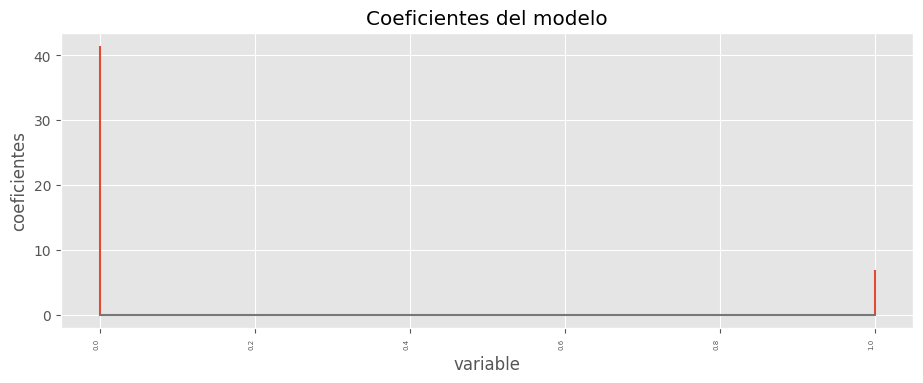

In [ ]:
# Grafica los coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': range(X_train.shape[1]),
                         'coef': reg.coef_.flatten()}
                  )
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [7]:
# Generar las predicciones y ver las primeras filas
predicciones = reg.predict(X_test)
predicciones[:10]

array([  4.06948383,  -8.55296757,  61.81115204, -35.14424179,
        97.68481838, -28.06763649,  -6.0817655 ,  -5.12764408,
        22.43641526, -45.02301645])

In [ ]:
# Calcula el error RMSE del modelo de regresión
rmse_ols = np.sqrt(
    mean_squared_error(
        y_test,
        predicciones
    )
)

print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 20.05957920845852


### Ridge

Busca optimizar:
\begin{equation}
    (Y-X\beta)^T(Y-X\beta) + \lambda\beta^T\beta
\end{equation}

In [11]:
# Crea y entrena un modelo de regresión Ridge con validación cruzada automática
modelo = RidgeCV(
    alphas        = np.logspace(-2, 4, 200),
    fit_intercept = True
)

modelo.fit(X_train, y_train)

,"alphas alphas: array-like of shape (n_alphas,), default=(0.1, 1.0, 10.0)Array of alpha values to try.Regularization strength; must be a positive float. Regularizationimproves the conditioning of the problem and reduces the variance ofthe estimates. Larger values specify stronger regularization.Alpha corresponds to ``1 / (2C)`` in other linear models such as:class:`~sklearn.linear_model.LogisticRegression` or:class:`~sklearn.svm.LinearSVC`.If using Leave-One-Out cross-validation, alphas must be strictly positive.",array([1.0000...00000000e+04])
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"scoring scoring: str, callable, default=NoneThe scoring method to use for cross-validation. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)``. See :ref:`scoring_callable` for details.- `None`: negative :ref:`mean squared error ` if cv is None (i.e. when using leave-one-out cross-validation), or :ref:`coefficient of determination ` (:math:`R^2`) otherwise.",None
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the efficient Leave-One-Out cross-validation- integer, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if ``y`` is binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used, else,:class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.",None
,"gcv_mode gcv_mode: {'auto', 'svd', 'eigen'}, default='auto'Flag indicating which strategy to use when performingLeave-One-Out Cross-Validation. Options are:: 'auto' : use 'svd' if n_samples > n_features, otherwise use 'eigen' 'svd' : force use of singular value decomposition of X when X is dense, eigenvalue decomposition of X^T.X when X is sparse. 'eigen' : force computation via eigendecomposition of X.X^TThe 'auto' mode is the default and is intended to pick the cheaperoption of the two depending on the shape of the training data.",None
,"store_cv_results store_cv_results: bool, default=FalseFlag indicating if the cross-validation values corresponding toeach alpha should be stored in the ``cv_results_`` attribute (seebelow). This flag is only compatible with ``cv=None`` (i.e. usingLeave-One-Out Cross-Validation)... versionchanged:: 1.5 Parameter name changed from `store_cv_values` to `store_cv_results`.",False
,"alpha_per_target alpha_per_target: bool, default=FalseFlag indicating whether to optimize the alpha value (picked from the`alphas` parameter list) for each target separately (for multi-outputsettings: multiple prediction targets). When set to `True`, afterfitting, the `alpha_` attribute will contain a value for each target.When set to `False`, a single alpha is used for all targets... versionadded:: 0.24",False


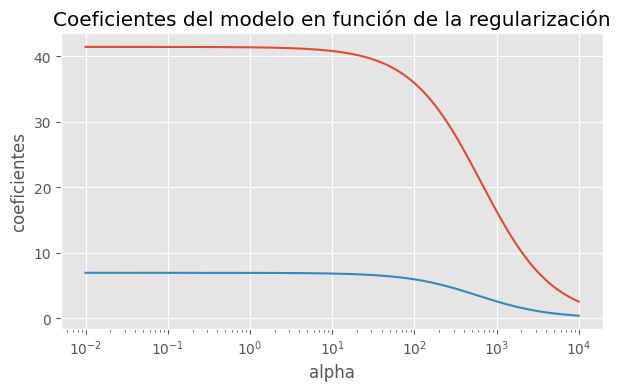

In [ ]:
# Ver cómo cambian los coeficientes de una regresión Ridge cuando aumenta la regularización (alpha)
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

In [ ]:
# Ver α óptimo que eligió la validación cruzada
modelo.alpha_

0.3448962260405758

In [17]:
# modelo.cv_values almacena el mse de cv para cada valor de alpha
mse_cv = np.full(len(modelo.alphas), np.nan)
mse_sd = np.full(len(modelo.alphas), np.nan)
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

In [ ]:
# Ver la forma del array
(len(modelo.alphas),)

(200,)

In [21]:
# Se identifica el óptimo y el óptimo + 1std
# mínimos
min_rmse    = np.min(rmse_cv)
sd_min_rmse = rmse_sd[np.argmin(rmse_cv)]

# criterio 1-SD (con control de arreglo vacío)
candidatos = rmse_cv[rmse_cv <= min_rmse + sd_min_rmse]
min_rsme_1sd = np.max(candidatos) if candidatos.size > 0 else min_rmse

# alphas óptimos
optimo     = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd = modelo.alphas[rmse_cv == min_rsme_1sd]

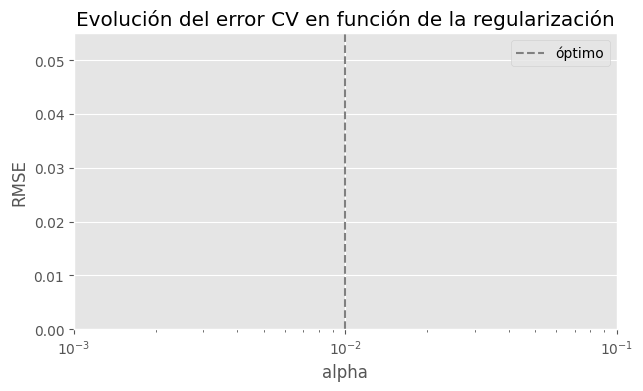

In [23]:
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

# línea del óptimo
ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

# línea óptimo 1-SD (solo si existe)
if np.size(optimo_1sd) > 0:
    ax.axvline(
        x         = optimo_1sd[0],
        c         = "blue",
        linestyle = '--',
        label     = 'óptimo_1sd'
    )
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.3448962260405758


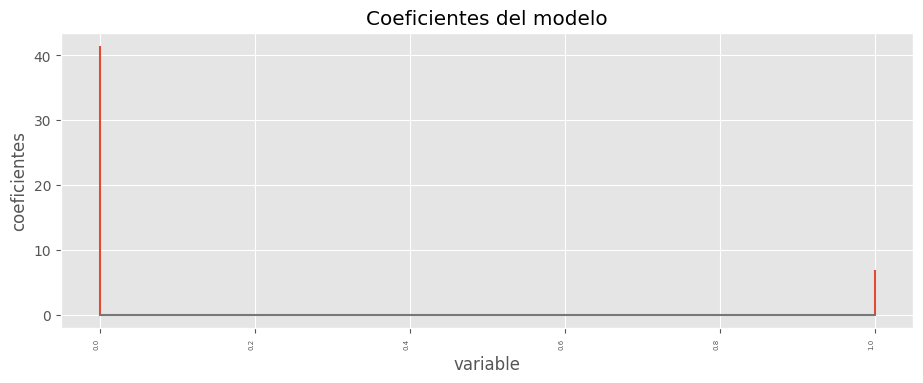

In [ ]:
# Grafica los coeficientes del modelo ridge
df_coeficientes = pd.DataFrame(
                        {'predictor': range(X_train.shape[1]),
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [26]:
# Generar las predicciones y ver las primeras filas
predicciones = modelo.predict(X=X_test)
predicciones[:10]

array([  3.8553288 ,  -8.69991305,  61.68435219, -35.21494536,
        97.42247359, -28.19858514,  -6.19249425,  -5.25040204,
        22.29873199, -45.19815875])

In [ ]:
# Calcula el error RMSE del modelo de ridge
rmse_ridge = np.sqrt(
    mean_squared_error(
        y_true = y_test,
        y_pred = predicciones
    )
)

print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 20.063598540429552


### LASSO

Busca optimizar:
\begin{equation}
    (Y-X\beta)^T(Y-X\beta) + + \lambda|\beta|_1
\end{equation}

In [ ]:
# Crea y entrena un modelo de regresión Lasso con validación cruzada automática
modelo_lasso = LassoCV(
            alphas  = np.logspace(-2, 3, 200),
            fit_intercept=True,
            cv  = 10
         )
modelo_lasso.fit(X = X_train, y = y_train);

Error in callback <function _draw_all_if_interactive at 0x0000023C3B418C20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

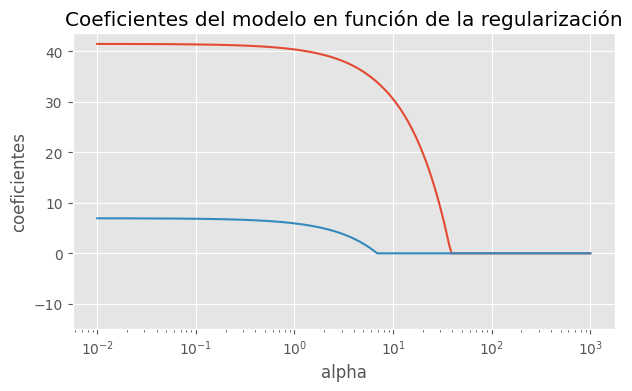

In [ ]:
# Reentrena modelos Lasso para distintos valores de alpha y grafica cómo cambian los coeficientes cuando aumenta la regularización
alphas = modelo_lasso.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

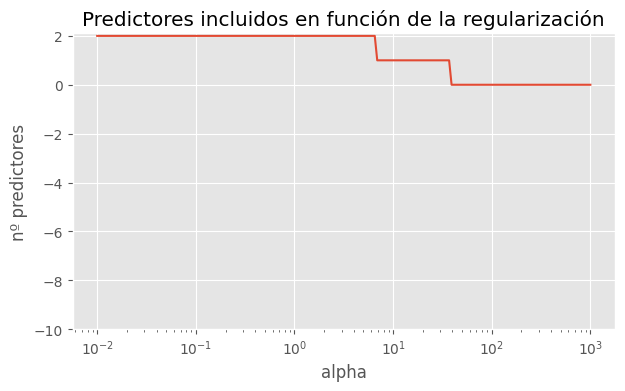

In [ ]:
# Cuenta cuántas variables quedan activas (coeficientes ≠ 0) en el modelo Lasso para cada valor de alpha y lo grafica
alphas = modelo_lasso.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_ != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-10,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

In [ ]:
# Calcular el MSE promedio de validación cruzada para cada valor de alpha en el modelo Lasso, promediando el error entre los folds
modelo_lasso.mse_path_.reshape((-1, 200)).mean(axis=0)

array([ 923.94093691,  837.90413397, 1152.66882184,  856.30691112,
       1124.79488716,  894.11721112, 1005.56040943, 1257.6020014 ,
       1120.73159926,  837.49450497,  913.11328025,  827.31626857,
       1135.54674263,  844.35554096, 1110.86141293,  883.57027468,
        992.92168073, 1240.26465998, 1105.7704575 ,  829.28884621,
        903.52182293,  817.87342658, 1120.33185883,  833.77885318,
       1098.34337707,  874.13923161,  981.71031892, 1224.73100114,
       1092.46691523,  822.0049372 ,  895.02850618,  809.45116393,
       1106.81373779,  824.42277516, 1087.09213686,  865.70420682,
        971.76775504, 1210.80904332, 1080.63856964,  815.54064897,
        887.51052402,  801.9385964 , 1094.80505456,  816.15028638,
       1076.97495285,  858.1583079 ,  962.95289275, 1198.32749522,
       1070.12302034,  809.80509111,  880.85864722,  795.23692017,
       1084.1390606 ,  808.83954308, 1067.87327024,  851.40621314,
        955.1401916 , 1187.13351121, 1060.7756798 ,  804.71737

In [33]:
# modelo.mse_path_  almacena el mse de cv para cada valor de alpha
mse_cv = modelo_lasso.mse_path_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo_lasso.mse_path_.reshape((-1, 200)).std(axis=0)
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

In [ ]:
# Localizar la posición del valor óptimo del parámetro de regularización dentro del conjunto de valores evaluados
np.where(modelo_lasso.alphas==optimo)

(array([0]),)

In [43]:
# Calcula el error cuadrático medio promedio (MSE) en validación cruzada para el noveno valor de alpha del Lasso.
modelo_lasso.mse_path_.reshape((-1, 200)).mean(axis=0)[8]

np.float64(1120.731599262876)

In [44]:
# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo_lasso.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo_lasso.alphas[rmse_cv == min_rsme_1sd]

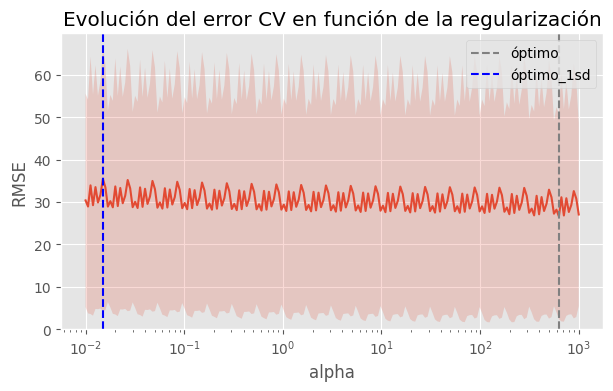

In [45]:
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo_lasso.alphas, rmse_cv)
ax.fill_between(
    modelo_lasso.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [46]:
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.3448962260405758


In [ ]:
# Calcula el mejor valor encontrado de alpha + 1 desviación estandar
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo_lasso.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo_lasso.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [666.9919663]


In [48]:
optimo

np.float64(0.015885651294280528)

In [50]:
# Crea y entrena un modelo Lasso final usando un valor específico de regularización (alpha), en este caso el óptimo.
modelo = Lasso(alpha=optimo)
modelo.fit(X_train, y_train);

In [ ]:
# Construir tabla con los coeficientes del modelo Lasso y luego filtra solo los predictores que el modelo realmente usa
df_coeficientes = pd.DataFrame(
                        {'predictor': range(X_train.shape[1]),
                         'coef': modelo.coef_}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,0,41.430328
1,1,6.925458


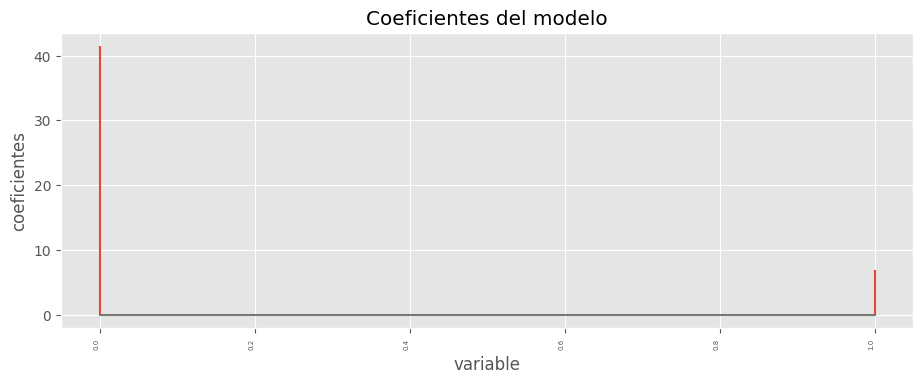

In [ ]:
# Ver gráfico de los coeficientes del modelo lasso
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [53]:
# Generar las predicciones y ver las primeras filas
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([  3.84336073,  -8.69875786,  61.69798575, -35.20031752,
        97.41084126, -28.19620906,  -6.1831988 ,  -5.24360579,
        22.30546739, -45.20732229])

In [ ]:
# Calcula el error RMSE del modelo de lasso
rmse_lasso = np.sqrt(
    mean_squared_error(
        y_test,
        predicciones
    )
)

print(f"El error (RMSE) de test es: {rmse_lasso}")

El error (RMSE) de test es: 20.063731762714788
